## Final Project Submission

Please fill out:
* Student name: Nyssa Mitchell
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Hardik 
* Blog post URL:


In [1]:
# data manipulation
import pandas as pd
import numpy as np
import json

# statistical analysis and modeling 
import statsmodels.api as sm
from statsmodels.formula.api import ols
import statsmodels.formula.api as smf
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score
from sklearn.dummy import DummyRegressor
import scipy.stats as stats

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import folium
%matplotlib inline

In [2]:
df = pd.read_csv('data/kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,...,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,...,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,...,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,...,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,...,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


In [3]:
df2 = df.drop(['date', 'view', 'sqft_above', 'sqft_basement', 'yr_renovated', 'sqft_living15', 'sqft_lot15', 'lat', 'long'], axis =1)

In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   id           21597 non-null  int64  
 1   price        21597 non-null  float64
 2   bedrooms     21597 non-null  int64  
 3   bathrooms    21597 non-null  float64
 4   sqft_living  21597 non-null  int64  
 5   sqft_lot     21597 non-null  int64  
 6   floors       21597 non-null  float64
 7   waterfront   19221 non-null  float64
 8   condition    21597 non-null  int64  
 9   grade        21597 non-null  int64  
 10  yr_built     21597 non-null  int64  
 11  zipcode      21597 non-null  int64  
dtypes: float64(4), int64(8)
memory usage: 2.0 MB


In [5]:
df2.price.replace('?', np.NaN, inplace=True)
df2.price = df2.price.astype(float)
df2.dropna(subset=['price'])

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074
...,...,...,...,...,...,...,...,...,...,...,...,...
21592,263000018,360000.0,3,2.50,1530,1131,3.0,0.0,3,8,2009,98103
21593,6600060120,400000.0,4,2.50,2310,5813,2.0,0.0,3,8,2014,98146
21594,1523300141,402101.0,2,0.75,1020,1350,2.0,0.0,3,7,2009,98144
21595,291310100,400000.0,3,2.50,1600,2388,2.0,NaN,3,8,2004,98027


In [6]:
df2.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,3.409825,7.657915,1970.999676,98077.951845
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.650546,1.173200,29.375234,53.513072
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,1.000000,3.000000,1900.000000,98001.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,3.000000,7.000000,1951.000000,98033.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,3.000000,7.000000,1975.000000,98065.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,4.000000,8.000000,1997.000000,98118.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,5.000000,13.000000,2015.000000,98199.000000


In [7]:
df2.columns

Index(['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot',
       'floors', 'waterfront', 'condition', 'grade', 'yr_built', 'zipcode'],
      dtype='object')

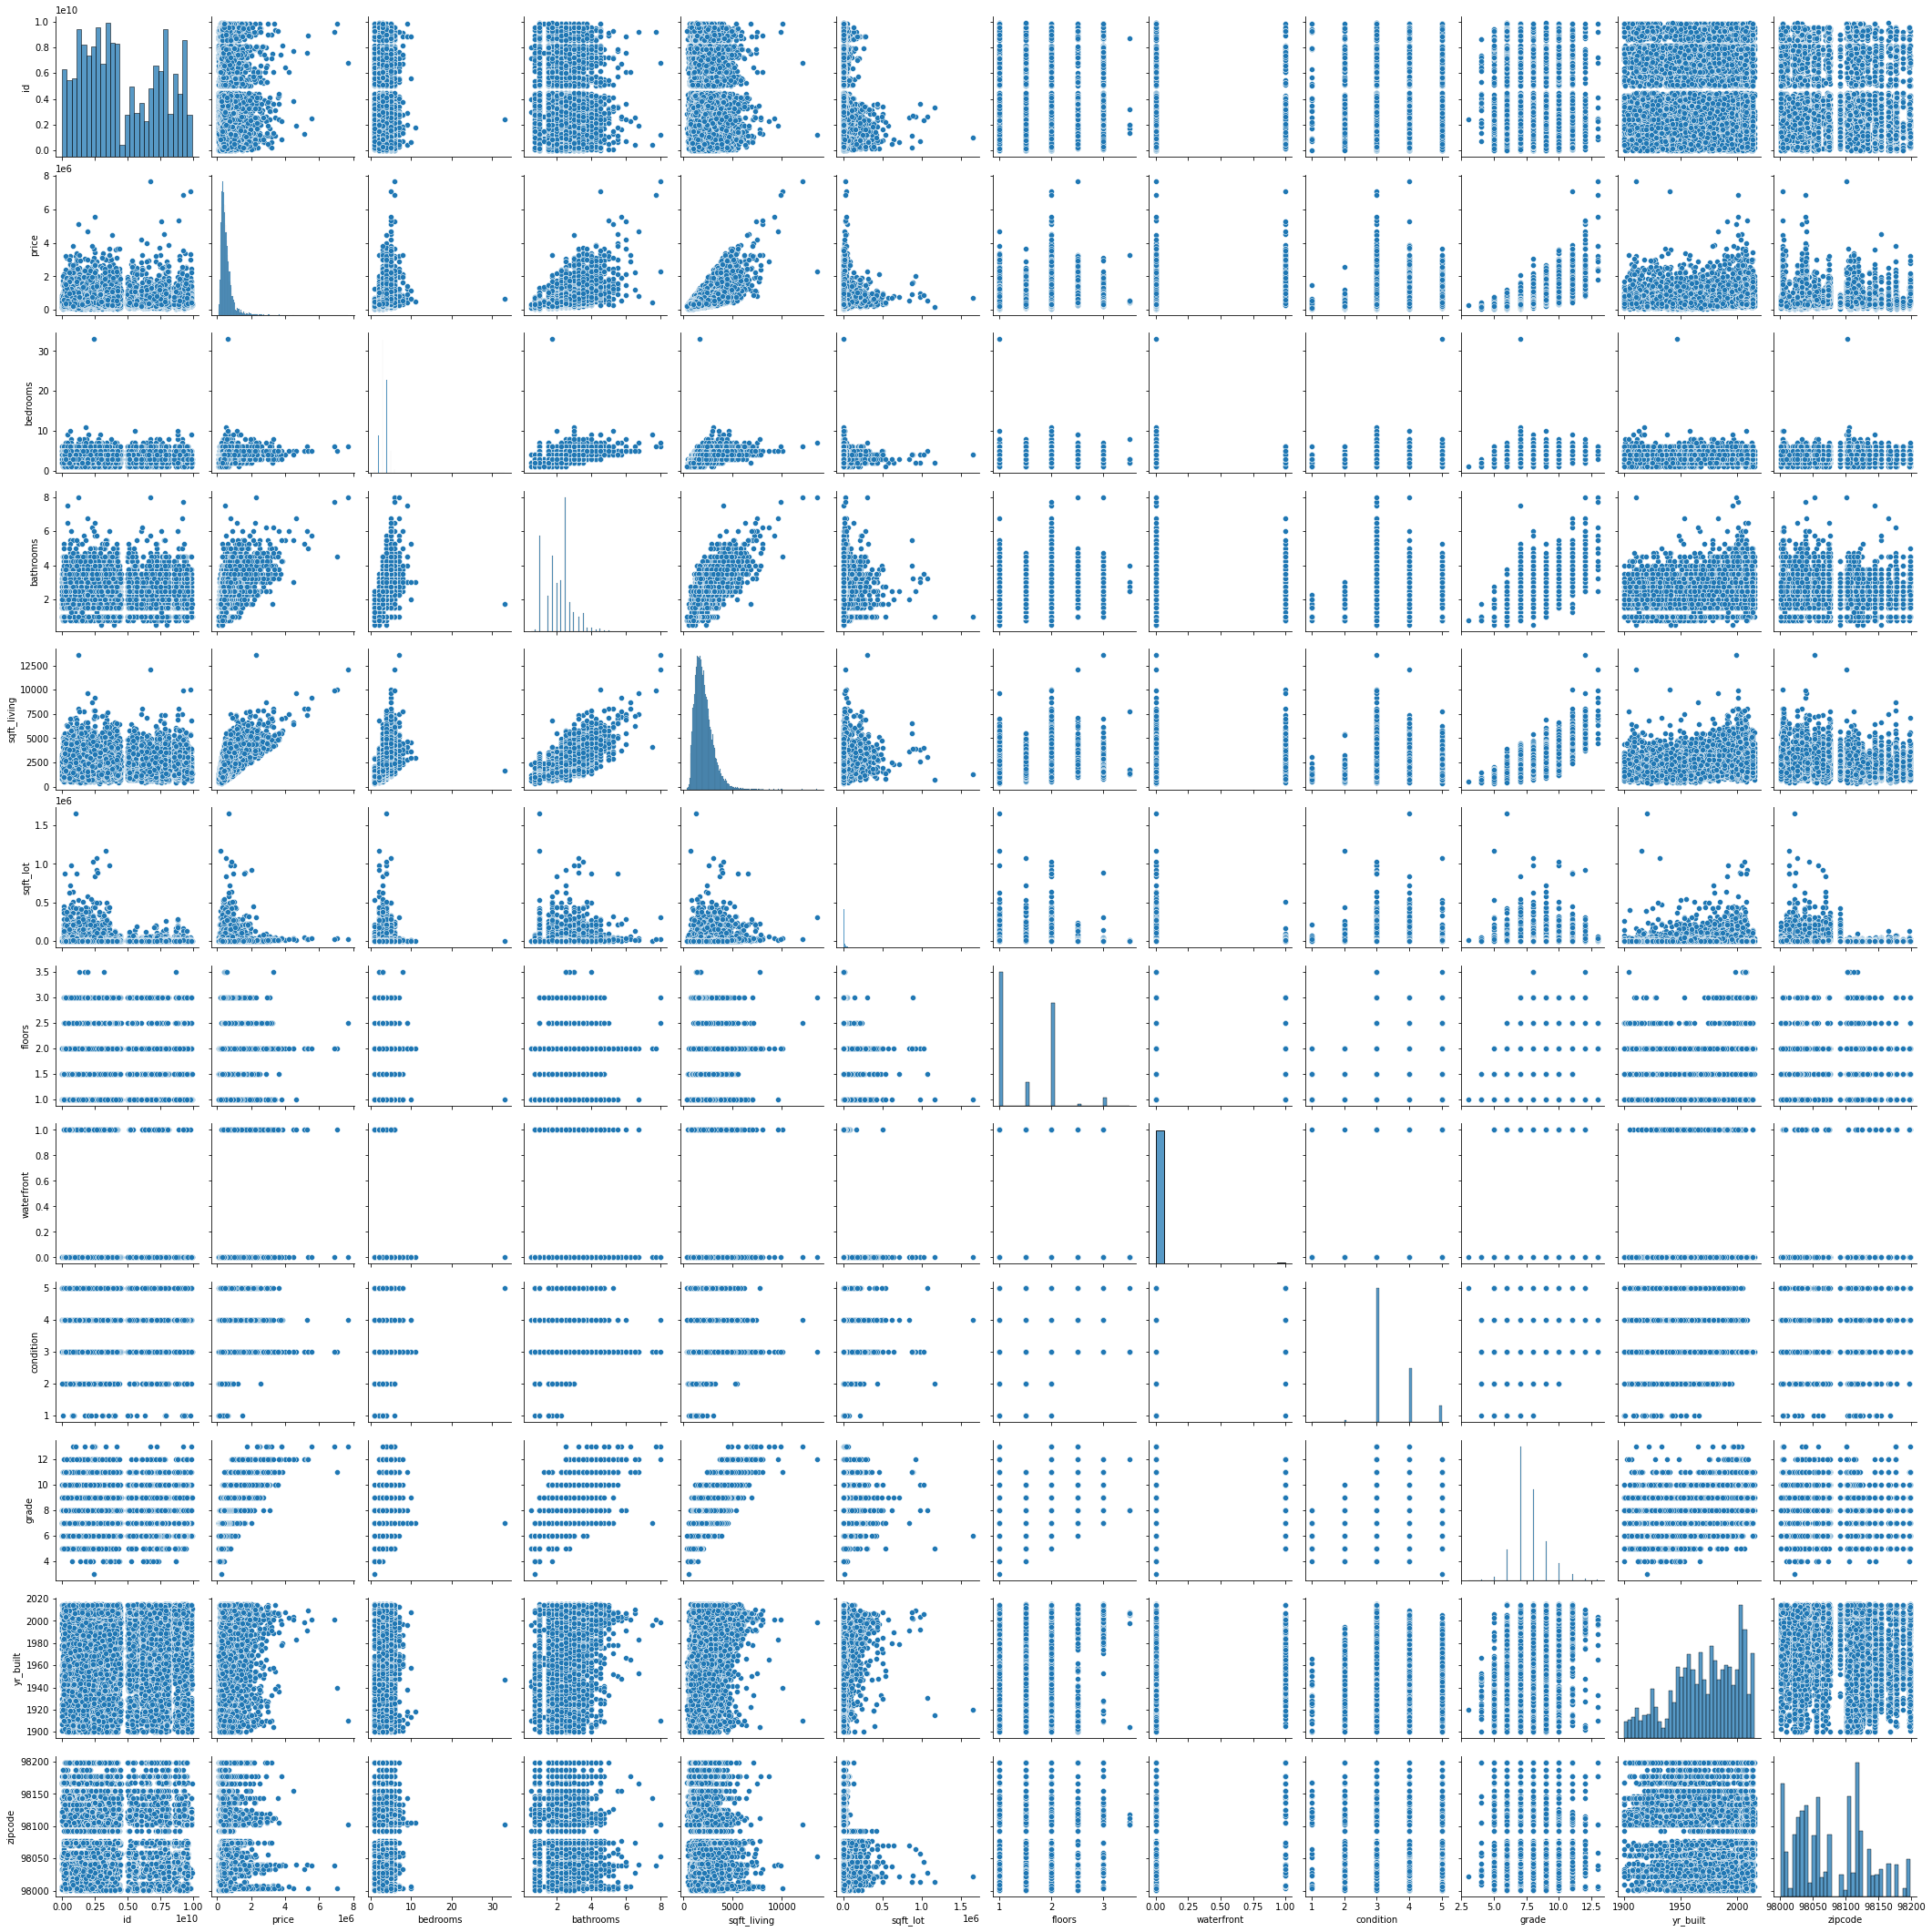

In [8]:
sns.pairplot(df2)

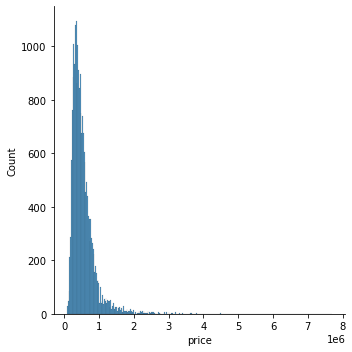

In [9]:
sns.displot(df2['price'])

<AxesSubplot:>

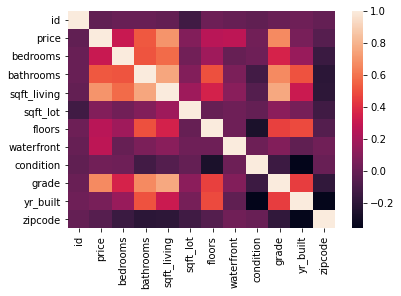

In [10]:
sns.heatmap(df2.corr())
            

In [11]:
#Highest correlation with Price is sqft_living and grade with a smalleller correlation with bathrooms and bedrooms

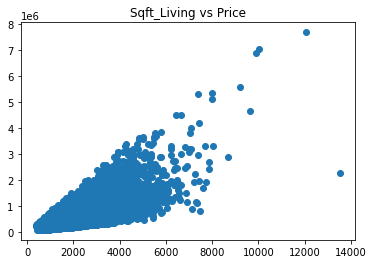

In [12]:
y = df['price']

X = df['sqft_living']

fig, ax = plt.subplots()
ax.scatter(X, y)
ax.set_title('Sqft_Living vs Price');

In [13]:
#now to see if there's any relationship with sqfootage, in zipcode areas and the house prices

In [14]:
zipcode_df = df2[['zipcode', 'price', 'sqft_living']]
zipcode_df = zipcode_df.groupby(['zipcode']).mean().sort_values('price', ascending='False').round(2)

In [15]:
model_price_sqft = ols(formula='price ~ sqft_living', data=zipcode_df).fit() 
model_price_sqft.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.585
Model:                            OLS   Adj. R-squared:                  0.579
Method:                 Least Squares   F-statistic:                     95.97
Date:                Sat, 02 Dec 2023   Prob (F-statistic):           1.26e-14
Time:                        21:48:15   Log-Likelihood:                -951.38
No. Observations:                  70   AIC:                             1907.
Df Residuals:                      68   BIC:                             1911.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -5.561e+05   1.16e+05     -4.777      0.000   -7.88e+05   -3.24e+05
sqft_living   532.2587     54.332      9.796      0.000     423.841     640.676
==============================================================================
Omnibus:                       11.344   Durbin-Watson:                   1.114
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               11.497
Skew:                           0.908   Prob(JB):                      0.00319
Kurtosis:                       3.801   Cond. No.                     1.06e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.06e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [16]:
#The correlation between average sales price and average square footage is 0.77. 

In [17]:
print(f'''
Correlation grouped by zip code: {zipcode_df.price.corr(zipcode_df.sqft_living):.2f}
R-squared of model: {model_price_sqft.rsquared:.0%}
''')


Correlation grouped by zip code: 0.77
R-squared of model: 59%



In [18]:
#testing normality of the residual errors for the above model


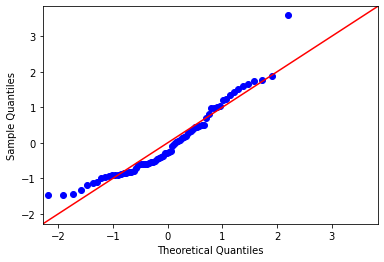

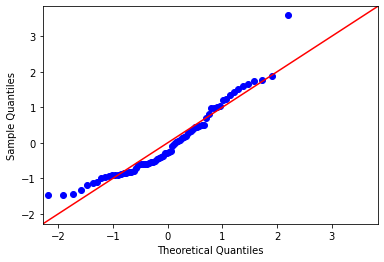

In [19]:
residuals = model_price_sqft.resid
sm.graphics.qqplot(residuals, dist=stats.norm, line='45', fit=True)

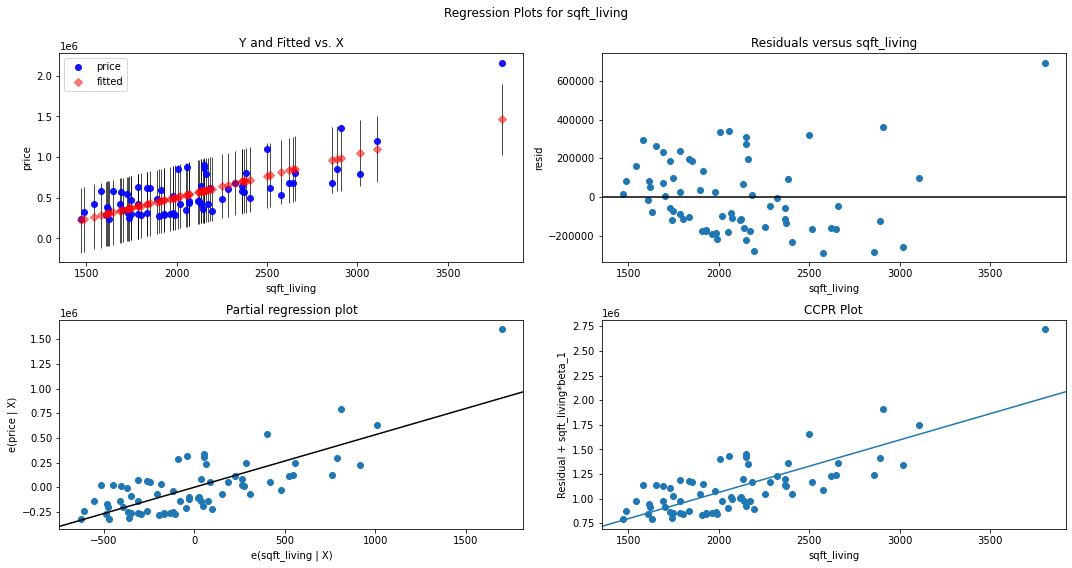

In [20]:
fig = plt.figure(figsize=(15,8))
fig = sm.graphics.plot_regress_exog(model_price_sqft, "sqft_living", fig=fig)
plt.show()

In [21]:
formula = 'price ~ bedrooms + bathrooms + sqft_living + sqft_lot + floors + waterfront + view + condition + grade + sqft_above + yr_built + yr_renovated'
model = ols(formula=formula, data=df).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.655
Model:                            OLS   Adj. R-squared:                  0.655
Method:                 Least Squares   F-statistic:                     2494.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:48:16   Log-Likelihood:            -2.1616e+05
No. Observations:               15762   AIC:                         4.323e+05
Df Residuals:                   15749   BIC:                         4.324e+05
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      6.36e+06   1.64e+05     38.901      0.000    6.04e+06    6.68e+06
bedrooms     -4.064e+04   2376.758    -17.101      0.000   -4.53e+04    -3.6e+04
bathrooms     4.951e+04   4145.267     11.943      0.000    4.14e+04    5.76e+04
sqft_living    173.9687      5.423     32.080      0.000     163.339     184.598
sqft_lot        -0.2737      0.043     -6.387      0.000      -0.358      -0.190
floors        2.321e+04   4432.873      5.235      0.000    1.45e+04    3.19e+04
waterfront    6.016e+05   2.21e+04     27.280      0.000    5.58e+05    6.45e+05
view          4.526e+04   2691.350     16.815      0.000       4e+04    5.05e+04
condition     1.789e+04   2953.748      6.058      0.000    1.21e+04    2.37e+04
grade         1.209e+05   2576.347     46.909      0.000    1.16e+05    1.26e+05
sqft_above       5.3409      5.254      1.017      0.309      -4.958      15.640
yr_built     -3648.9423     83.767    -43.560      0.000   -3813.136   -3484.748
yr_renovated     9.0954      4.674      1.946      0.052      -0.066      18.257
==============================================================================
Omnibus:                    12071.139   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           915686.290
Skew:                           3.081   Prob(JB):                         0.00
Kurtosis:                      39.828   Cond. No.                     4.18e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.18e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [22]:
formula4 = 'price ~ sqft_living'
liv_mod = ols(formula=formula4, data=df).fit()
liv_mod_sum = liv_mod.summary()

liv_mod_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.493
Model:                            OLS   Adj. R-squared:                  0.493
Method:                 Least Squares   F-statistic:                 2.097e+04
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:48:16   Log-Likelihood:            -3.0006e+05
No. Observations:               21597   AIC:                         6.001e+05
Df Residuals:                   21595   BIC:                         6.001e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -4.399e+04   4410.023     -9.975      0.000   -5.26e+04   -3.53e+04
sqft_living   280.8630      1.939    144.819      0.000     277.062     284.664
==============================================================================
Omnibus:                    14801.942   Durbin-Watson:                   1.982
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           542662.604
Skew:                           2.820   Prob(JB):                         0.00
Kurtosis:                      26.901   Cond. No.                     5.63e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.63e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [23]:
formula1 = 'price ~ bedrooms'
bed_mod = ols(formula=formula1, data=df).fit()
bed_mod_sum = bed_mod.summary()

bed_mod_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.095
Model:                            OLS   Adj. R-squared:                  0.095
Method:                 Least Squares   F-statistic:                     2276.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:48:16   Log-Likelihood:            -3.0631e+05
No. Observations:               21597   AIC:                         6.126e+05
Df Residuals:                   21595   BIC:                         6.126e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   1.272e+05   8979.293     14.166      0.000     1.1e+05    1.45e+05
bedrooms    1.225e+05   2566.930     47.709      0.000    1.17e+05    1.27e+05
==============================================================================
Omnibus:                    18831.341   Durbin-Watson:                   1.961
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          1195104.832
Skew:                           3.900   Prob(JB):                         0.00
Kurtosis:                      38.598   Cond. No.                         14.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
formula3 = 'price ~ bedrooms+bathrooms+sqft_living+sqft_lot+floors+waterfront+view+condition+grade+sqft_above'
room_mod = ols(formula=formula3, data=df).fit()
room_mod_sum = room_mod.summary()

room_mod_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.608
Model:                            OLS   Adj. R-squared:                  0.608
Method:                 Least Squares   F-statistic:                     2971.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:48:16   Log-Likelihood:            -2.6397e+05
No. Observations:               19164   AIC:                         5.280e+05
Df Residuals:                   19153   BIC:                         5.281e+05
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept   -6.981e+05   1.87e+04    -37.368      0.000   -7.35e+05   -6.61e+05
bedrooms     -3.58e+04   2310.225    -15.496      0.000   -4.03e+04   -3.13e+04
bathrooms   -1.501e+04   3748.576     -4.004      0.000   -2.24e+04   -7660.332
sqft_living   219.5784      5.157     42.579      0.000     209.470     229.687
sqft_lot       -0.3588      0.042     -8.459      0.000      -0.442      -0.276
floors      -2968.3697   4221.694     -0.703      0.482   -1.12e+04    5306.521
waterfront   5.973e+05   2.12e+04     28.129      0.000    5.56e+05    6.39e+05
view         5.997e+04   2563.626     23.393      0.000    5.49e+04     6.5e+04
condition    5.447e+04   2708.546     20.110      0.000    4.92e+04    5.98e+04
grade        1.028e+05   2427.681     42.328      0.000     9.8e+04    1.08e+05
sqft_above    -25.9877      5.041     -5.155      0.000     -35.869     -16.106
==============================================================================
Omnibus:                    14039.807   Durbin-Watson:                   1.978
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           856094.509
Skew:                           2.941   Prob(JB):                         0.00
Kurtosis:                      35.211   Cond. No.                     5.52e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.52e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
formula2 = 'price ~ bathrooms'

bath_mod = ols(formula=formula2, data=df).fit()
bath_mod_sum = bath_mod.summary()

bath_mod_sum

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                  price   R-squared:                       0.277
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     8256.
Date:                Sat, 02 Dec 2023   Prob (F-statistic):               0.00
Time:                        21:48:16   Log-Likelihood:            -3.0389e+05
No. Observations:               21597   AIC:                         6.078e+05
Df Residuals:                   21595   BIC:                         6.078e+05
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept   8712.6518   6224.769      1.400      0.162   -3488.356    2.09e+04
bathrooms   2.512e+05   2765.054     90.863      0.000    2.46e+05    2.57e+05
==============================================================================
Omnibus:                    17251.570   Durbin-Watson:                   1.960
Prob(Omnibus):                  0.000   Jarque-Bera (JB):           882735.889
Skew:                           3.452   Prob(JB):                         0.00
Kurtosis:                      33.550   Cond. No.                         7.76
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
models = ['Model 1', 'Model 2', 'Model 3', 'Model 4', 'Model', 'Final Model']
models_num = np.array([0.095, 0.277, 0.493, 0.609, 0.609, 0.655])

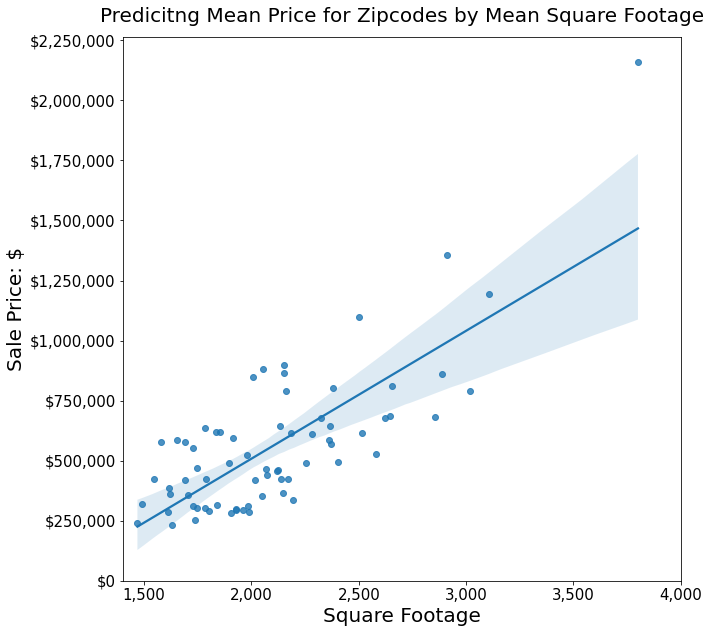

In [27]:

fig, ax = plt.subplots(figsize=(10,10)) 
ax = sns.regplot(x=zipcode_df.sqft_living.values, y=zipcode_df.price.values)

# title
plt.title('Predicitng Mean Price for Zipcodes by Mean Square Footage', size=20, pad=15)

# x axis
x_ticks = [1500, 2000, 2500, 3000, 3500, 4000]
x_labels = ['1,500', '2,000', '2,500', '3,000', '3,500', '4,000']
plt.xlabel('Square Footage', size=20)
plt.xticks(x_ticks, x_labels, size=15)
ax.set_xlim(1400,4000)

# y axis 
plt.ylabel('Sale Price: $', size=20)
y_ticks = [0, 250000, 500000, 750000, 1000000, 1250000, 1500000, 1750000, 2000000, 2250000]
y_labels = ['$0', '$250,000', '$500,000', '$750,000', '$1,000,000', '$1,250,000', '$1,500,000', 
          '$1,750,000', '$2,000,000', '$2,250,000']
plt.yticks(y_ticks, y_labels, size=15);

In [28]:
df2.corr()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
id,1.000000,-0.016772,0.001150,0.005162,-0.012241,-0.131911,0.018608,-0.004176,-0.023803,0.008188,0.021617,-0.008211
price,-0.016772,1.000000,0.308787,0.525906,0.701917,0.089876,0.256804,0.276295,0.036056,0.667951,0.053953,-0.053402
bedrooms,0.001150,0.308787,1.000000,0.514508,0.578212,0.032471,0.177944,-0.002386,0.026496,0.356563,0.155670,-0.154092
bathrooms,0.005162,0.525906,0.514508,1.000000,0.755758,0.088373,0.502582,0.067282,-0.126479,0.665838,0.507173,-0.204786
sqft_living,-0.012241,0.701917,0.578212,0.755758,1.000000,0.173453,0.353953,0.110230,-0.059445,0.762779,0.318152,-0.199802
sqft_lot,-0.131911,0.089876,0.032471,0.088373,0.173453,1.000000,-0.004814,0.023143,-0.008830,0.114731,0.052946,-0.129586
floors,0.018608,0.256804,0.177944,0.502582,0.353953,-0.004814,1.000000,0.021883,-0.264075,0.458794,0.489193,-0.059541
waterfront,-0.004176,0.276295,-0.002386,0.067282,0.110230,0.023143,0.021883,1.000000,0.017642,0.087383,-0.026079,0.031057
condition,-0.023803,0.036056,0.026496,-0.126479,-0.059445,-0.008830,-0.264075,0.017642,1.000000,-0.146896,-0.361592,0.002888
grade,0.008188,0.667951,0.356563,0.665838,0.762779,0.114731,0.458794,0.087383,-0.146896,1.000000,0.447865,-0.185771


In [29]:
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,True,True,False,False,False,False,False,True,True,False,False,False,False,False,True,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False


In [30]:
# sqft_living is highly correlated with bathrooms,  grade, sqft_above and sqft_living15.
#These will be dropped due to collinearity

In [31]:
Y = df2[['price']]
X = df2.drop(['id', 'price', 'bathrooms', 'grade', 'waterfront'], axis=1)
X.head()

,bedrooms,sqft_living,sqft_lot,floors,condition,yr_built,zipcode
0,3,1180,5650,1.0,3,1955,98178
1,3,2570,7242,2.0,3,1951,98125
2,2,770,10000,1.0,3,1933,98028
3,4,1960,5000,1.0,5,1965,98136
4,3,1680,8080,1.0,3,1987,98074


In [32]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
      

In [33]:
dummy = DummyRegressor(strategy='mean')
dummy.fit(X_train, Y_train)
dY_pred = dummy.predict(X_train)
dY_pred_test = dummy.predict(X_test)

In [34]:
dummy.score(X_train, Y_train)

0.0

In [35]:
linreg=LinearRegression()
linreg.fit(X, (df2[['price']]))
linreg.score(X, (df2[['price']]))

0.5513268538873783

In [36]:
linreg = LinearRegression()
linreg.fit(X_train, Y_train)
Y_pred = linreg.predict(X_train)
Y_pred_test = linreg.predict(X_test)

In [37]:
linreg.score(X_test, Y_test)

0.5346593294030146

In [38]:
r2_score(Y_test, Y_pred_test)

0.5346593294030146

In [39]:
RMSE_train = mean_squared_error(Y_train, Y_pred, squared=False)
RMSE_test = mean_squared_error(Y_test, Y_pred_test, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  246160.37680873045
RMSE for training set is:  246118.5134740286


In [40]:
Y_pred.shape

(17277, 1)

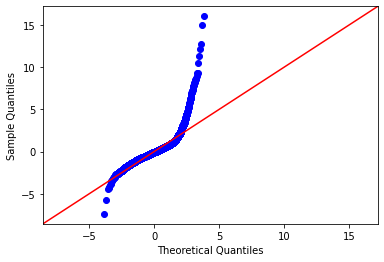

In [41]:
resid1 = Y_train - Y_pred

fig = sm.graphics.qqplot(resid1['price'], dist=stats.norm, line='45', fit=True)

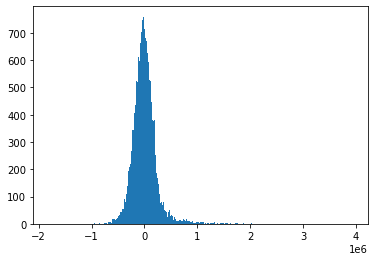

In [42]:
plt.hist(resid1['price'], bins='auto')
plt.show()

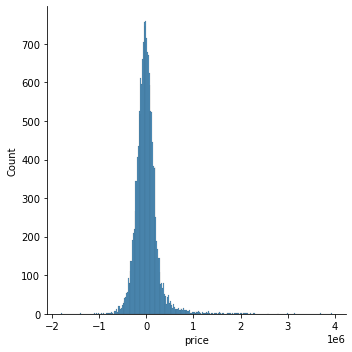

In [43]:
sns.displot(resid1['price']);

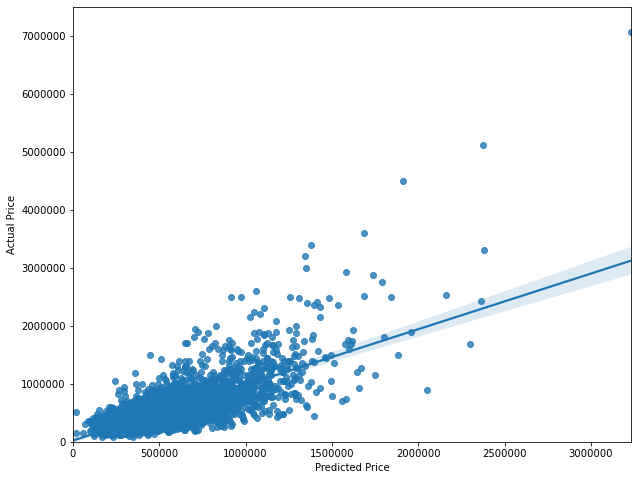

In [44]:
#visualizing predicted price vs actual price
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=Y_pred_test, y=Y_test, data=df2)
ax.set_xlabel("Predicted Price")
ax.set_ylabel("Actual Price")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.ticklabel_format(useOffset=False, style='plain')
plt.show();

In [45]:
#examining skew and kurtosis of sklearn model

from scipy.stats import kurtosis, skew
print(skew(resid1))
print(kurtosis(resid1))

[2.61201568]
[22.03120357]


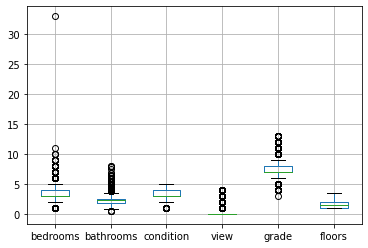

In [46]:
#boxplot of various features to examine outliers
df.boxplot(column = ['bedrooms', 'bathrooms', 'condition', 'view', 'grade', 'floors']);

<AxesSubplot:>

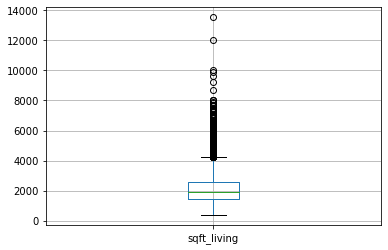

In [47]:
df2.boxplot(column=['sqft_living'])

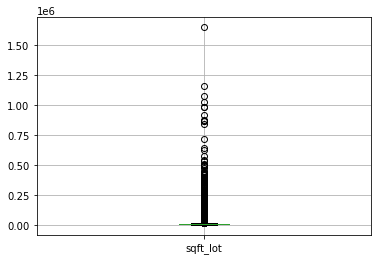

In [48]:
df2.boxplot(column='sqft_lot');

In [49]:
#model is affected by outliers

In [50]:
total_drop = []
for col in ['sqft_living', 'bedrooms', 'sqft_lot', 'sqft_above', 'bathrooms', 'floors']:
    to_drop = np.where(np.abs(stats.zscore(df[col])) > 1.96)[0].tolist()
    total_drop.extend(to_drop)
    
drop_idx = list(set(total_drop))


df3 = df2.drop(to_drop)
df3.head()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,condition,grade,yr_built,zipcode
0,7129300520,221900.0,3,1.00,1180,5650,1.0,NaN,3,7,1955,98178
1,6414100192,538000.0,3,2.25,2570,7242,2.0,0.0,3,7,1951,98125
2,5631500400,180000.0,2,1.00,770,10000,1.0,0.0,3,6,1933,98028
3,2487200875,604000.0,4,3.00,1960,5000,1.0,0.0,5,7,1965,98136
4,1954400510,510000.0,3,2.00,1680,8080,1.0,0.0,3,8,1987,98074


In [51]:
y1 = df3[['price']]
X1 = df3.drop(['id', 'price', 'waterfront'], axis=1)

In [52]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.2,
                                                   random_state=42)

In [53]:
linreg = LinearRegression()
linreg.fit(X1_train, y1_train)
y1_pred = linreg.predict(X1_train)
y1_pred_test = linreg.predict(X1_test)

In [54]:

r2_score(y1_test, y1_pred_test)

0.614135385881543

In [55]:
RMSE_train = mean_squared_error(y1_train, y1_pred, squared=False)
RMSE_test = mean_squared_error(y1_test, y1_pred_test, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  218239.58499103313
RMSE for training set is:  229389.37467561502


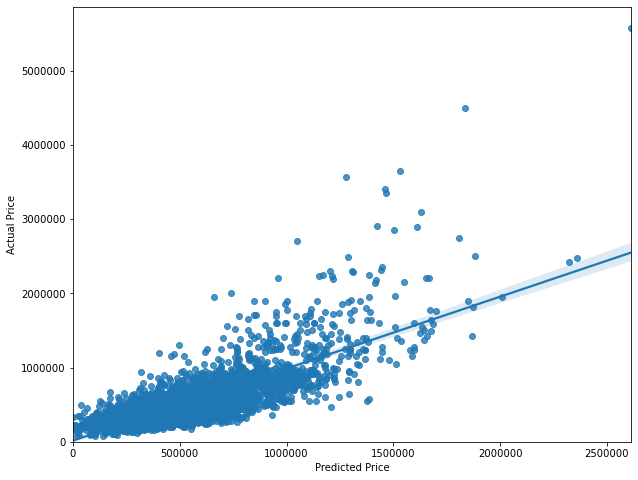

In [56]:
fig, ax = plt.subplots(figsize=(10, 8))
sns.regplot(x=y1_pred_test, y=y1_test, data=df)
ax.set_xlabel("Predicted Price")
ax.set_ylabel("Actual Price")
ax.set_xlim(xmin=0)
ax.set_ylim(ymin=0)
ax.ticklabel_format(useOffset=False, style='plain')

plt.show();

In [57]:
#removing outliers improved the RMSE. Will scaling the features help further?

In [58]:
scaler = StandardScaler()

In [59]:
scaler.fit(X1_train)

StandardScaler()

In [60]:

scaler.transform(X1_train)

array([[-1.48324435, -0.78917715, -1.16811018, ..., -0.54917707,
         1.16745968,  1.04466332],
       [-0.4121506 , -1.4367002 , -1.21166034, ..., -0.54917707,
        -0.64917259,  0.91421268],
       [-0.4121506 , -0.46541563,  0.36703314, ..., -0.54917707,
        -0.71772475,  0.74649043],
       ...,
       [ 0.65894316,  0.50586894,  1.36868693, ...,  0.30030116,
         0.68759455, -1.22890496],
       [-0.4121506 ,  0.18210742,  1.05294824, ...,  1.99925761,
         0.44766199, -1.32208398],
       [-1.48324435, -1.4367002 , -1.34231084, ..., -0.54917707,
        -0.47779218,  0.74649043]])

In [61]:
regression = LinearRegression()
regression.fit(scaler.transform(X1_train), y1_train)
regression.score(scaler.transform(X1_test), y1_test)

0.6141353858815695

In [62]:
X_scale_train = scaler.transform(X1_train)
X_scale_test = scaler.transform(X1_test)

In [63]:
y_scale_pred = regression.predict(X_scale_train)
y_scale_testpred = regression.predict(X_scale_test)
y_scale_pred.shape

(16783, 1)

In [64]:
print(r2_score(y1_test, y_scale_testpred))

0.6141353858815695


In [65]:
RMSE_train = mean_squared_error(y1_train, y_scale_pred, squared=False)
RMSE_test = mean_squared_error(y1_test, y_scale_testpred, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  218239.58499102568
RMSE for training set is:  229389.37467561502


In [66]:
#standard scalar did not improve model

In [67]:
#minimaxscalar method might

In [68]:
from sklearn.preprocessing import MinMaxScaler
mmscaler = MinMaxScaler()
mmscaler.fit(X_train)

MinMaxScaler()

In [69]:

linreg2 = LinearRegression()
linreg2.fit(mmscaler.transform(X_train), Y_train)
linreg2.score(mmscaler.transform(X_test), Y_test)

0.5346593294030149

In [70]:
X_mmscale_train = mmscaler.transform(X_train)
X_mmscale_test = mmscaler.transform(X_test)

In [71]:

Y_mmscale_pred = linreg2.predict(X_mmscale_train)
Y_mmscale_testpred = linreg2.predict(X_mmscale_test)

In [72]:

r2_score(Y_test, Y_mmscale_testpred)

0.5346593294030149

In [73]:
RMSE_train = mean_squared_error(Y_train, Y_mmscale_pred, squared=False)
RMSE_test = mean_squared_error(Y_test, Y_mmscale_testpred, squared=False)
print('RMSE for test set is: ', RMSE_test)
print("RMSE for training set is: ", RMSE_train)

RMSE for test set is:  246160.3768087304
RMSE for training set is:  246118.51347402862
